<a href="https://colab.research.google.com/github/SIDIBEMoussa/Banking-credit-aproval-predicting/blob/main/Banking_credit_aproval_predicting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd

In [8]:
data=pd.read_excel("Data.xlsx")

In [9]:
data=data.drop(['Unnamed: 0',"ID","Approuvée"],axis=1)
data=data.dropna()

In [10]:
data.head(2)

,Sexe,Motorisé,PropriétaireImmobilier,NombreEnfants,RevenuAnnuel,SecteurActivité,NiveauEducation,EtatCivil,TypeLogement,CategorieEmploi,MembreFamille,Age,Experience,target
0,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,Security staff,2,58,3,0
1,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,Sales staff,1,52,8,0


In [11]:
stri=["Sexe","Motorisé","PropriétaireImmobilier","SecteurActivité","NiveauEducation","EtatCivil","TypeLogement","CategorieEmploi"]

In [12]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()

In [13]:
for i in stri:
      data[i]=lb.fit_transform(data[i])


In [14]:
import seaborn as sns
import matplotlib.pyplot as pl
import numpy as np

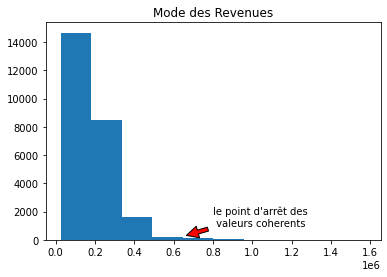

In [15]:
p=pl.hist(data.RevenuAnnuel)
a=pl.annotate("le point d'arrêt des \n valeurs coherents",xy=(0.65*10**6,250),xytext=(800000,1000),arrowprops = {'facecolor': 'red','shrink': 0.1})
m=pl.title("Mode des Revenues")

Avec ce histogramme nous pouvons facilement detecter les outliers afin de les enlever sinon plus influent sur les valeurs de tendance centrale et de dispersion

In [16]:
data=data[data.RevenuAnnuel<350000]

## Analyse univariée

1. Mesures de tendances centrales  et mesures de dispersion
2. Visualisation graphiques des données

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


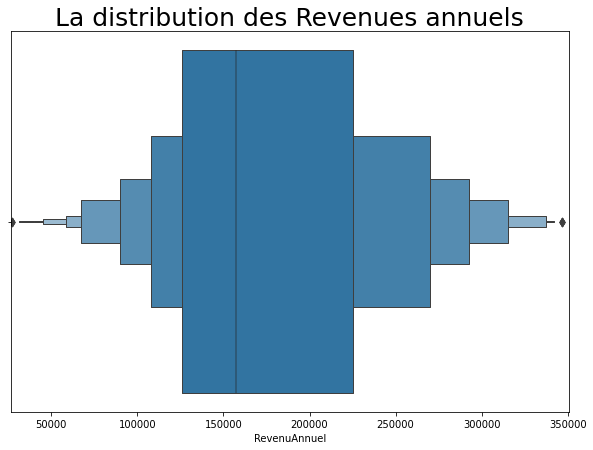

In [17]:
pl.figure(figsize=(10,7))
sns.boxenplot("RevenuAnnuel",data=data,width=0.9).set_title("La distribution des Revenues annuels",size=25)
pl.axis(xmin=26500,xmax=350500)
pl.show()

Avec ce graphique ci-dessus nous avons une idée globale ci sur la distribution des salaires annuels des clients dont la moyenne est environ 180000

In [18]:
round((data.RevenuAnnuel).std())

65579

# La dispersion autour de la tendance central est std: 65579

# La dispersion du salaire annuel

Alors nous avions une très grande variabilité entre les salaires annuels de nos clients avec plus ou moins des valeurs qui peuvent tourner autour de la moyenne avec une de 65579 ce qui enorme au point de vue salariale alors nous observons une difference de classe sociale entre les clients voulant contracter le crédit

In [19]:
data.RevenuAnnuel.skew(),data.RevenuAnnuel.kurtosis()

(0.4637152516442095, -0.4807490784268902)

# La forme du Revenu annuel des clients
* La plupart de nos clients ont un salaire plus étalé à droite de la moyenne ce qui resulte de la positivité de skewness empirique
* Notre variable a des observations moins concentrées: la distribution est plus applatis que la distibution normale

# Nous allons nous intérêsser dans cette partie à l'âge de nos candidats pour un crédit bancaire

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


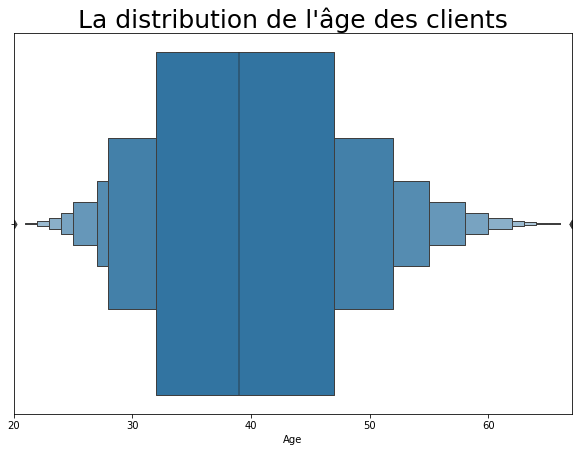

In [20]:
pl.figure(figsize=(10,7))
sns.boxenplot("Age",data=data,width=0.9).set_title("La distribution de l'âge des clients",size=25)
pl.axis(xmin=20,xmax=67)
pl.show()

## Nous avions une clientèle plus concentré dans le tranche d'âge [37 ans - 57 ans] 

In [21]:
round(data.Age.std())

10

## La dispersion de l'âge autour de la tendance central est std: 10

In [22]:
data.Age.skew(),data.Age.kurtosis()

(0.28735032524142645, -0.741356087952862)

# La forme de l'âge des clients
* La plupart de nos clients ont un âge plus étalé à droite  de la  moyenne ce qui resulte de la positivité de skewness empirique
* Notre variable a des observations moins concentrées: la distribution est plus applatis que la distibution normale

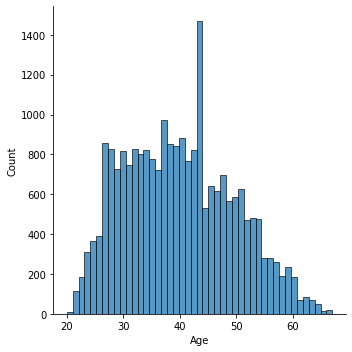

In [23]:
sns.displot(data.Age)

In [24]:
sizes=[len(data[data.target==0]),len(data[data.target==1])]
labels=["Refusées","Accordées"]
explode=(0.5,0)

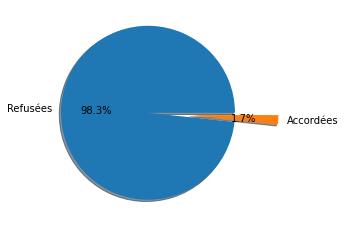

In [25]:
p=pl.pie(sizes,explode,labels,autopct='%1.1f%%',shadow=True)

data.pivot_table("Motorisé",index="target",columns="Sexe",aggfunc="sum")